In [315]:
import numpy as np
import matplotlib.pyplot as plt
import random      
import copy
from matplotlib import animation
import math
import heapq

In [316]:
# 参数设置

In [368]:
cell_size = 100
selection_size = 5
dim = 2
value_range = 10
max_clone = 10
mutation_rate = 0.3
mutation_step = 2
drop_size = 20
iter_max = 50

In [318]:
# 初始化粒子

In [319]:
def init_cells(size = cell_size):
    random.seed()
    X = np.zeros((size,dim))
    for i in range(size):
        for j in range(dim):
            X[i][j] = random.random()*2*value_range-value_range
    return X

In [320]:
# 代价函数

In [321]:
def rastrigin(x):
    Z = 10 * dim
    for i in range(dim):
        Z = Z + x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i])
    return Z

In [322]:
# 亲和度

In [323]:
def calculate_aff(fun):
    aff = 1/(1 + fun)
    return aff

In [324]:
# 控制点在范围内

In [325]:
def project(x):
    for i in range(len(x)):
        if x[i] > value_range:
            x[i] = value_range
        elif x[i] < -value_range:
            x[i] = -value_range
    return x

In [326]:
# 细胞选择

In [327]:
def select(X, select_size = selection_size):
    aff_arr = []
    for i in range(len(X)):
        fun = rastrigin(X[i])
        aff = calculate_aff(fun)
        aff_arr.append(aff)
    best_aff_list = heapq.nlargest(select_size, aff_arr)
    index_list = list(map(aff_arr.index, heapq.nlargest(select_size, aff_arr)))
    return index_list, best_aff_list

In [328]:
# 细胞克隆

In [329]:
def clone(X, select_arr, best_aff_list):
    clone_cells = []
    aff_arr = []
    for i in range(len(select_arr)):
        aff = best_aff_list[i]
        cell = X[select_arr[i]]
        clone_num = round(max(1,best_aff_list[i]*max_clone))
        for j in range(clone_num):
            clone_cells.append(list(copy.deepcopy(cell)))
            aff_arr.append(aff)
    return clone_cells, aff_arr

In [330]:
# 细胞变异

In [331]:
def mutation(clone_cells, aff_arr):
    mutationed_cells = []
    rdn = np.random.random(len(clone_cells))
    for i in range(len(clone_cells)):
        if rdn[i] < mutation_rate:
            cell = copy.deepcopy(clone_cells[i])
            j = np.random.randint(2)
            cell[j] = cell[j] + (random.random()*2-1)*mutation_step
            cell = project(cell)
            mutationed_cells.append(cell)
        else:
            mutationed_cells.append(copy.deepcopy(clone_cells[i]))
    return mutationed_cells

In [332]:
# CSA

In [333]:
def get_CSA():
    best_aff_arr = []
    x_arr = []
    best_pos = []
    best_pos_arr = []
    best_aff = 9999
    X = init_cells()
    print('--------------初始化------------')
    for it in range(iter_max):
        print('--------------第'+str(it+1)+'步------------')
        select_arr, best_aff_list = select(X)
        clone_cells, aff_arr = clone(X, select_arr, best_aff_list)
        new_cells = mutation(clone_cells, aff_arr)
        new_X = np.delete(X,select_arr,0)
        new_X = new_X.tolist()
        new_X.extend(new_cells)
        remain_arr, aff_list = select(new_X, cell_size-drop_size)
        remain_cells = []
        for i in range(len(remain_arr)):
            remain_cells.append(copy.deepcopy(new_X[remain_arr[i]]))
        initial_arr = init_cells(drop_size).tolist()
        remain_cells.extend(initial_arr)
        X = remain_cells
        x_arr.append(copy.deepcopy(X))
        a,b = select(X,1)
        if rastrigin(X[a[0]]) < best_aff:
            best_aff = rastrigin(X[a[0]])
            best_pos = copy.deepcopy(X[a[0]])
        print('最佳的适应度值为：',best_aff)
        print('粒子到过最优位置为：',best_pos)
        best_aff_arr.append(best_aff)
        best_pos_arr.append(best_pos)
    print('达到终止条件，运行结束')
    return best_aff_arr,x_arr,best_pos_arr

In [369]:
best_aff_arr,x_arr,best_pos_arr = get_CSA()

--------------初始化------------
--------------第1步------------
10 10 10 100 100 20 100
最佳的适应度值为： 14.140203827239883
粒子到过最优位置为： [0.2192835840732581, 0.8274133126205374]
--------------第2步------------
10 10 10 100 100 20 100
最佳的适应度值为： 11.122602231763512
粒子到过最优位置为： [0.795945743437322, 0.13353606496626647]
--------------第3步------------
10 10 10 100 100 20 100
最佳的适应度值为： 11.122602231763512
粒子到过最优位置为： [0.795945743437322, 0.13353606496626647]
--------------第4步------------
10 10 10 100 100 20 100
最佳的适应度值为： 11.122602231763512
粒子到过最优位置为： [0.795945743437322, 0.13353606496626647]
--------------第5步------------
10 10 10 100 100 20 100
最佳的适应度值为： 5.521204206830204
粒子到过最优位置为： [1.0392425307436106, 2.018226118204517]
--------------第6步------------
10 11 11 101 100 20 100
最佳的适应度值为： 5.521204206830204
粒子到过最优位置为： [1.0392425307436106, 2.018226118204517]
--------------第7步------------
10 11 11 101 100 20 100
最佳的适应度值为： 5.521204206830204
粒子到过最优位置为： [1.0392425307436106, 2.018226118204517]
--------------第8步------------
1

<IPython.core.display.Javascript object>


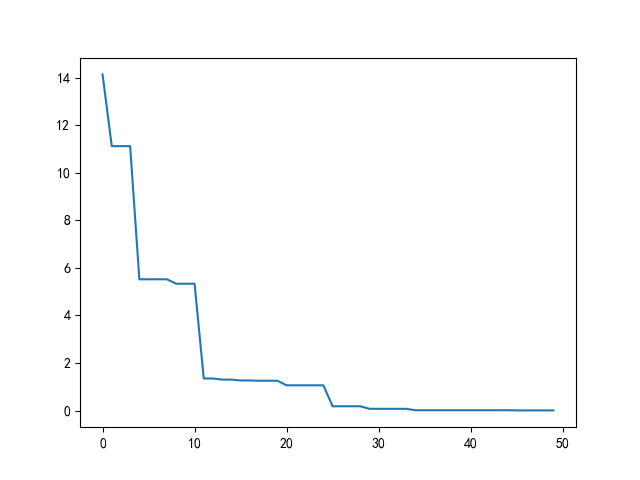

In [370]:
%matplotlib notebook 
plt.plot(best_aff_arr)
plt.show()

<IPython.core.display.Javascript object>


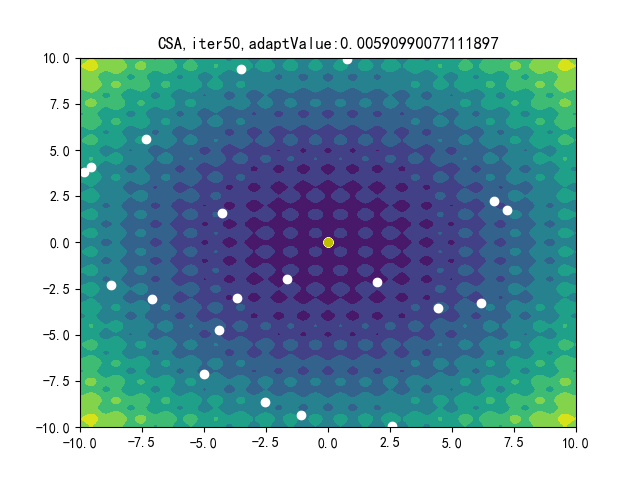

In [371]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = x_arr
best_data = best_pos_arr
n = 500
x = np.linspace(-value_range, value_range, n)
y = np.linspace(-value_range, value_range, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin([X,Y]))
point1, = plt.plot(np.array(xdata[0])[:,0],np.array(xdata[0])[:,1], 'wo')
point2, = plt.plot(best_data[0][0],best_data[0][1], 'yo')

def init():
    ax.set_xlim(-value_range, value_range)
    ax.set_ylim(-value_range, value_range)
    return point1,point2

def update(frame):  # 帧
    point1.set_data(np.array(xdata[frame])[:,0],np.array(xdata[frame])[:,1])
    point2.set_data(best_data[frame][0],best_data[frame][1])
    i = frame
    a = rastrigin(best_data[frame])
    ax.set_title('CSA,iter'+str(i+1)+',adaptValue:'+str(a),loc = 'center')
    return point1,point2

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(x_arr)),
    init_func=init,
    interval=500,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('CSA.gif',writer='pillow')